# 초음파 광물 예측

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
df = pd.read_csv('C:/Workspace/DeepLearning/dataset/sonar.csv', header=None)
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [4]:
# 'R', 'M' 문자열 확인
df[60].unique()

array(['R', 'M'], dtype=object)

In [5]:
# 문자를 수치화하기
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(df[60].values)

array([1, 1, 0, 0, 0])

In [6]:
X = df.iloc[:,:-1].values
X.shape

(208, 60)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, stratify=y_encoded, random_state=seed
)
X_train.shape, X_test.shape

((156, 60), (52, 60))

## 모델 정의/설정/학습/평가

- 24/8/1 layers, 200 epochs

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                1464      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 200       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 1,673
Trainable params: 1,673
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [11]:
history = model.fit(
    X, y_encoded,
    validation_split=0.2,
    batch_size=50,
    epochs=200,
    verbose=0
    )

In [12]:
acc = model.evaluate(X, y_encoded)
print(f'정확도: {acc[1]:.4f}')

7/7 [==============================] - 0s 855us/step - loss: 0.4467 - accuracy: 0.8798
정확도: 0.8798


- 30/1, rmsprop, 100 epochs

In [14]:
model2 = Sequential()
model2.add(Dense(30, input_shape=(8,), activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [15]:
model2.compile(
    optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']
)

In [18]:
history2 = model.fit(
    X, y_encoded,
    validation_split=0.2,
    batch_size=50,
    epochs=100,
    verbose=0
    )

In [19]:
acc = model.evaluate(X, y_encoded)
print(f'정확도: {acc[1]:.4f}')

7/7 [==============================] - 0s 712us/step - loss: 0.5289 - accuracy: 0.8894
정확도: 0.8894


- 24/12/8/1 layers, 200 epochs

In [20]:
model3 = Sequential()
model3.add(Dense(24, input_shape=(8,), activation='relu'))
model3.add(Dense(12, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 24)                216       
_________________________________________________________________
dense_6 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 629
Trainable params: 629
Non-trainable params: 0
_________________________________________________________________


In [21]:
model3.compile(
    optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']
)

In [22]:
history3 = model.fit(
    X, y_encoded,
    validation_split=0.2,
    batch_size=50,
    epochs=200,
    verbose=0
    )

In [23]:
acc = model.evaluate(X, y_encoded)
print(f'정확도: {acc[1]:.4f}')

7/7 [==============================] - 0s 707us/step - loss: 0.6622 - accuracy: 0.9038
정확도: 0.9038


## 정확도가 가장 높은 모델 시각화

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
y_acc = history3.history['accuracy']
x_len = np.arange(len(y_acc))

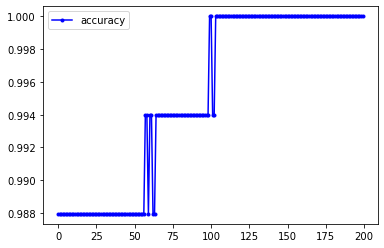

In [29]:
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_acc, "o-", c="blue", markersize=3, label='accuracy')
plt.legend()
plt.show()